In [1]:
import scanpy as sc
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

import statsmodels.formula.api as smf

%matplotlib inline

## Importing, filtering and normalizing datasets

Importing **DMSO 24hr expt3** as **adata_ref** and **Dabrafenib 24hr expt3** as **adata**.

In [2]:
adata_ref =sc.read_10x_mtx('../data/DMSO_24hr_expt3/') 

In [3]:
adata = sc.read_10x_mtx('../data/Dabrafenib_24hr_expt3/')

In [4]:
adata_ref.strings_to_categoricals()
adata.strings_to_categoricals()

Creating dataframe.

In [5]:
adata_ref.to_df() 
adata.to_df()

,MIR1302-10,FAM138A,OR4F5,RP11-34P13.7,RP11-34P13.8,AL627309.1,RP11-34P13.14,RP11-34P13.9,AP006222.2,RP4-669L17.10,...,KIR3DL2-1,AL590523.1,CT476828.1,PNRC2-1,SRSF10-1,AC145205.1,BAGE5,CU459201.1,AC002321.2,AC002321.1
AAACCTGAGAACAATC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGAGAGTGACC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGAGCAATATG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
AAACCTGAGGCTACGA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGAGTAAGTAC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCATCGGCGGTT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGTCATCGTTTGCC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGTCATCTAACTCT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
TTTGTCATCTCCGGTT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Filtering out cells that contain less than 200 detected genes. Filtering out genes that have been detected in less than 3 cells.

In [6]:
sc.pp.filter_cells(adata_ref, min_genes=200)
sc.pp.filter_genes(adata_ref, min_cells=3)

sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

Annotating the group of mitochondrial genes as 'mt', then filtering out mitochondrial genes. The values have been adjusted according to the scatter plots seen in the exploratory notebooks.

In [7]:
adata_ref.var['mt'] = adata_ref.var_names.str.startswith('MT-')  
sc.pp.calculate_qc_metrics(adata_ref, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

adata.var['mt'] = adata.var_names.str.startswith('MT-')  
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

In [8]:
adata_ref = adata_ref[adata_ref.obs.n_genes_by_counts < 8000, :] 
adata_ref = adata_ref[adata_ref.obs.pct_counts_mt < 20, :]

adata = adata[adata.obs.n_genes_by_counts < 7000, :]
adata = adata[adata.obs.pct_counts_mt < 20, :]

Normalizing and logarithmizing. Defining the data on the same variables to be able to run `sc.tl.ingest`. Running principal component analysis (PCA), computing the neighborhood graph, embedding the graph in two dimensions using <a href="https://arxiv.org/abs/1802.03426" target="_blank">UMAP</a>.

In [9]:
sc.pp.normalize_total(adata_ref, target_sum=1e4)
sc.pp.normalize_total(adata, target_sum=1e4)

/home/ubuntu/anaconda3/envs/mercedesz/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [10]:
sc.pp.log1p(adata_ref)
sc.pp.log1p(adata)

In [11]:
var_names = adata_ref.var_names.intersection(adata.var_names)
adata_ref = adata_ref[:, var_names]
adata = adata[:, var_names]

In [12]:
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)

In [13]:
sc.pp.pca(adata_ref)
sc.pp.neighbors(adata_ref)
sc.tl.umap(adata_ref)

## Adding metadata

Metadata is included from both the *Classifications.csv* files and the <a href="https://depmap.org/portal/download/" target="_blank">DepMap</a> database. Necessary datasets to download from DepMap linked below.
Specifying **meta_ref** as **DMSO 24h expt3 metadata** and **meta** as **Dabrafenib 24h expt3 metadata**. Metadata are added to adata.

In [14]:
meta_ref = pd.read_csv('../data/DMSO_24hr_expt3/classifications.csv', sep=',', header=0, index_col=0)

In [15]:
adata_ref.obs['Cell type'] = meta_ref.loc[adata_ref.obs.index, 'singlet_ID']

In [16]:
meta = pd.read_csv('../data/Dabrafenib_24hr_expt3/classifications.csv', sep=',', header=0, index_col=0)

In [17]:
adata.obs['Cell type'] = meta.loc[adata.obs.index, 'singlet_ID']

In [18]:
adata.obs['DepMap_ID'] = meta.loc[adata.obs.index, 'DepMap_ID']
adata_ref.obs['DepMap_ID'] = meta_ref.loc[adata_ref.obs.index, 'DepMap_ID']

... storing 'Cell type' as categorical
... storing 'DepMap_ID' as categorical


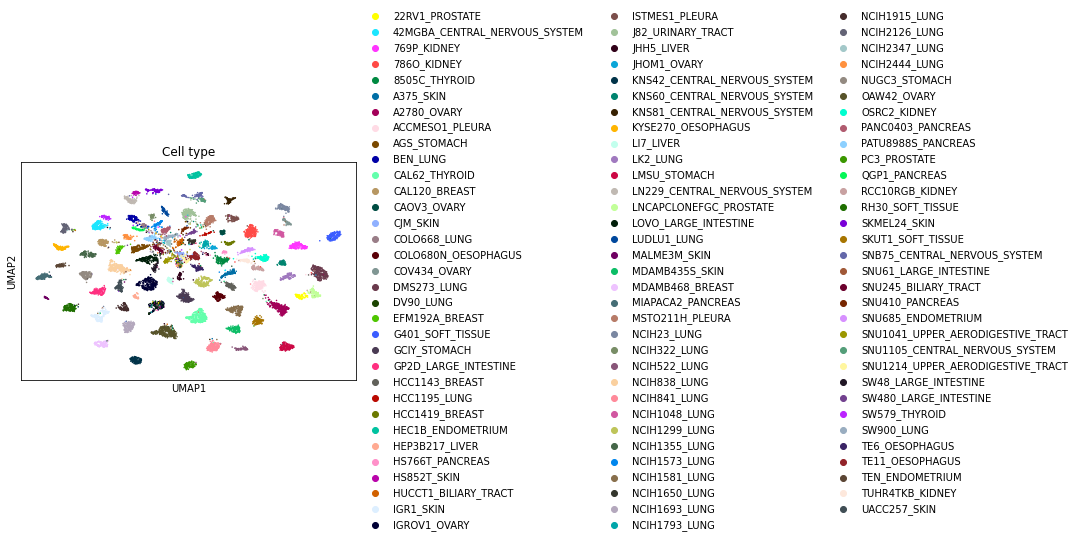

In [19]:
sc.pl.umap(adata, color='Cell type') 

... storing 'Cell type' as categorical
... storing 'DepMap_ID' as categorical


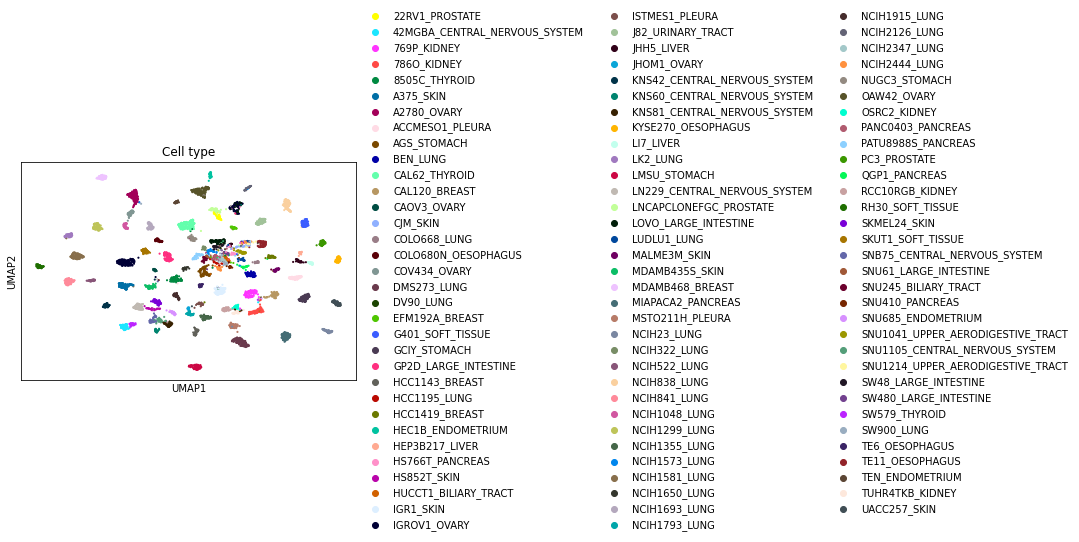

In [20]:
sc.pl.umap(adata_ref, color='Cell type') 

Since the dataset contains plenty of cell lines, we add *'Tissue type'* to dataframes.

In [21]:
f = lambda x: x.split('_', 1  ) [1]
adata_ref.obs['Tissue type'] = adata_ref.obs['Cell type'].apply( f )

In [22]:
f = lambda x: x.split('_', 1  ) [1]
adata.obs['Tissue type'] = adata.obs['Cell type'].apply( f )

... storing 'Tissue type' as categorical


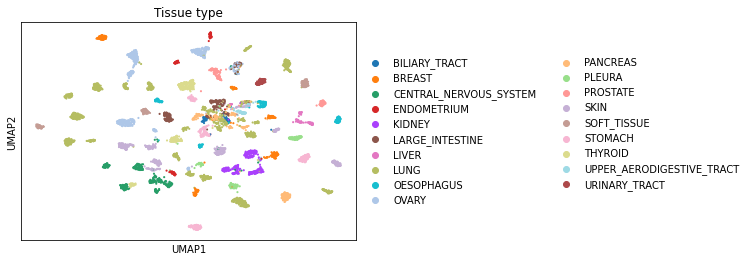

In [23]:
sc.pl.umap(adata_ref, color='Tissue type') 

... storing 'Tissue type' as categorical


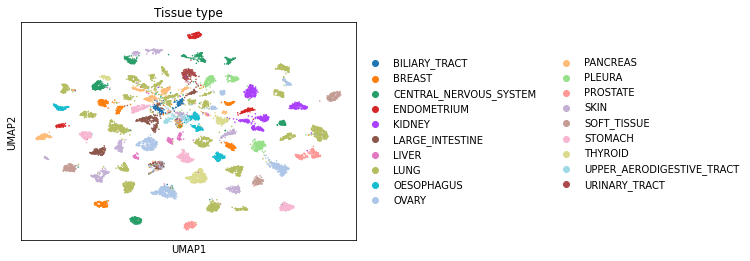

In [24]:
sc.pl.umap(adata, color='Tissue type') 

## Filtering BRAF variants, adding mutation counts

DepMap dataset <a href="https://ndownloader.figshare.com/files/26261527" target="_blank">CCLE_mutations.csv </a> to download.

Since Dabrafenib is a  B-raf (BRAF) protein inhibitor, we are filtering for BRAF variants.

In [25]:
mut = pd.read_csv('../data/DepMap/CCLE_mutations.csv', sep='\t', header=0, index_col=None)

/home/ubuntu/anaconda3/envs/mercedesz/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (19,29,30) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [26]:
fil = np.in1d(mut['Hugo_Symbol'], ['BRAF'])   
mut = mut[fil]
mut

,Hugo_Symbol,Entrez_Gene_Id,NCBI_Build,Chromosome,Start_position,End_position,Strand,Variant_Classification,Variant_Type,Reference_Allele,...,ExAC_AF,CGA_WES_AC,SangerWES_AC,SangerRecalibWES_AC,RNAseq_AC,HC_AC,RD_AC,WGS_AC,Variant_annotation,DepMap_ID
121592,BRAF,673,37,7,140434423,140434423,+,Nonsense_Mutation,SNP,C,...,NaN,NaN,68:432,107:634,NaN,NaN,NaN,NaN,damaging,ACH-002121
121593,BRAF,673,37,7,140434435,140434435,+,Missense_Mutation,SNP,T,...,NaN,84:190,NaN,NaN,NaN,NaN,NaN,NaN,other non-conserving,ACH-001960
121594,BRAF,673,37,7,140434458,140434458,+,Missense_Mutation,SNP,G,...,NaN,NaN,129:342,133:357,7:24,NaN,NaN,NaN,other non-conserving,ACH-000962
121595,BRAF,673,37,7,140434458,140434458,+,Missense_Mutation,SNP,G,...,NaN,95:263,NaN,NaN,NaN,7:41,NaN,NaN,other non-conserving,ACH-001145
121596,BRAF,673,37,7,140434475,140434475,+,Silent,SNP,C,...,NaN,NaN,NaN,70:416,NaN,NaN,NaN,NaN,silent,ACH-000786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121885,BRAF,673,37,7,140624440,140624440,+,Missense_Mutation,SNP,C,...,0.000032,NaN,NaN,NaN,16:36,NaN,NaN,NaN,other non-conserving,ACH-000588
121886,BRAF,673,37,7,140624440,140624440,+,Missense_Mutation,SNP,C,...,0.000032,NaN,NaN,NaN,11:18,NaN,NaN,NaN,other non-conserving,ACH-000683
121887,BRAF,673,37,7,140624440,140624440,+,Missense_Mutation,SNP,C,...,0.000032,NaN,NaN,NaN,11:5,NaN,NaN,NaN,other non-conserving,ACH-000807
121888,BRAF,673,37,7,140624440,140624440,+,Missense_Mutation,SNP,C,...,0.000032,NaN,NaN,NaN,14:13,NaN,NaN,NaN,other non-conserving,ACH-000959


In [27]:
mut['Variant_Classification'].value_counts()

Missense_Mutation    196
Silent                68
Splice_Site           13
Frame_Shift_Del        8
In_Frame_Del           7
Frame_Shift_Ins        3
In_Frame_Ins           2
Nonsense_Mutation      1
Name: Variant_Classification, dtype: int64

Keeping activating missense mutations since they affect the function of Trametinib.

In [28]:
fil = mut['Variant_Classification'] == 'Missense_Mutation'
mut = mut[fil]

Verifying mutation counts by DepMap IDs.

In [29]:
mut_count = mut['DepMap_ID'].value_counts()
mut_count

ACH-000882    3
ACH-000935    3
ACH-001563    2
ACH-001239    2
ACH-000999    2
             ..
ACH-002026    1
ACH-000404    1
ACH-002042    1
ACH-000327    1
ACH-000941    1
Name: DepMap_ID, Length: 185, dtype: int64

Adding mutation counts to dataframes as *'BRAF_mut_count'*.

In [30]:
common_cells = list(set(adata.obs['DepMap_ID']) & set(mut_count.index))
adata.obs['BRAF_mut_count'] = 0
fil = np.in1d(adata.obs['DepMap_ID'], common_cells)
adata.obs.loc[adata.obs.index[fil], 'BRAF_mut_count'] = mut_count[adata.obs['DepMap_ID'][fil].values].values

In [31]:
common_cells = list(set(adata_ref.obs['DepMap_ID']) & set(mut_count.index))
adata_ref.obs['BRAF_mut_count'] = 0
fil = np.in1d(adata_ref.obs['DepMap_ID'], common_cells)
adata_ref.obs.loc[adata_ref.obs.index[fil], 'BRAF_mut_count'] =\
    mut_count[adata_ref.obs['DepMap_ID'][fil].values].values

In [32]:
adata_ref.obs

,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,Cell type,DepMap_ID,Tissue type,BRAF_mut_count
AAACCTGAGAGCAATT-1,5984,5982,47009.0,2072.0,4.407667,UACC257_SKIN,ACH-000579,SKIN,1
AAACCTGAGATCTGAA-1,6890,6890,68559.0,5358.0,7.815166,HEC1B_ENDOMETRIUM,ACH-000941,ENDOMETRIUM,1
AAACCTGCACACTGCG-1,5473,5472,41918.0,1544.0,3.683382,LOVO_LARGE_INTESTINE,ACH-000950,LARGE_INTESTINE,0
AAACCTGCACCAGATT-1,6429,6429,58468.0,1795.0,3.070055,COLO680N_OESOPHAGUS,ACH-000717,OESOPHAGUS,0
AAACCTGCAGCTCGAC-1,7269,7269,63829.0,1734.0,2.716634,KYSE270_OESOPHAGUS,ACH-000873,OESOPHAGUS,0
...,...,...,...,...,...,...,...,...,...
TTTGTCAGTGCAACGA-1,6105,6104,43790.0,3959.0,9.040877,BEN_LUNG,ACH-000603,LUNG,0
TTTGTCAGTTCAACCA-1,5320,5319,33704.0,1985.0,5.889509,RH30_SOFT_TISSUE,ACH-000833,SOFT_TISSUE,0
TTTGTCATCATTGCCC-1,7225,7225,67526.0,5214.0,7.721470,IGROV1_OVARY,ACH-000966,OVARY,0
TTTGTCATCGCAGGCT-1,6286,6286,37616.0,2180.0,5.795406,KNS42_CENTRAL_NERVOUS_SYSTEM,ACH-000622,CENTRAL_NERVOUS_SYSTEM,0


## Adding copy number variation

DepMap dataset <a href="https://ndownloader.figshare.com/files/26261524" target="_blank">CCLE_gene_cn.csv </a> to download.

In [33]:
cnv = pd.read_csv('../data/DepMap/CCLE_gene_cn.csv', sep=',', header=0, index_col=0)

Filtering BRAF genes.

In [34]:
cnv_BRAF = cnv.loc[:,cnv.columns.str.startswith("BRAF")]
cnv_BRAF 

,BRAF (673)
ACH-000001,1.046850
ACH-000002,1.004020
ACH-000003,1.091531
ACH-000004,0.816365
ACH-000005,0.831232
...,...
ACH-002510,1.351090
ACH-002511,1.678063
ACH-001421,0.976895
ACH-001711,1.089226


In [35]:
cnv_BRAF = cnv_BRAF['BRAF (673)']
cnv_BRAF

ACH-000001    1.046850
ACH-000002    1.004020
ACH-000003    1.091531
ACH-000004    0.816365
ACH-000005    0.831232
                ...   
ACH-002510    1.351090
ACH-002511    1.678063
ACH-001421    0.976895
ACH-001711    1.089226
ACH-001656    0.610982
Name: BRAF (673), Length: 1745, dtype: float64

Adding BRAF copy number variation to dataframes as *'BRAF_cnv'*.

In [36]:
adata.obs['BRAF_cnv'] = adata.obs['DepMap_ID'].map(cnv_BRAF)
adata_ref.obs['BRAF_cnv'] = adata_ref.obs['DepMap_ID'].map(cnv_BRAF)

In [37]:
adata_ref.obs

,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,Cell type,DepMap_ID,Tissue type,BRAF_mut_count,BRAF_cnv
AAACCTGAGAGCAATT-1,5984,5982,47009.0,2072.0,4.407667,UACC257_SKIN,ACH-000579,SKIN,1,1.082413
AAACCTGAGATCTGAA-1,6890,6890,68559.0,5358.0,7.815166,HEC1B_ENDOMETRIUM,ACH-000941,ENDOMETRIUM,1,1.114512
AAACCTGCACACTGCG-1,5473,5472,41918.0,1544.0,3.683382,LOVO_LARGE_INTESTINE,ACH-000950,LARGE_INTESTINE,0,1.078604
AAACCTGCACCAGATT-1,6429,6429,58468.0,1795.0,3.070055,COLO680N_OESOPHAGUS,ACH-000717,OESOPHAGUS,0,0.816903
AAACCTGCAGCTCGAC-1,7269,7269,63829.0,1734.0,2.716634,KYSE270_OESOPHAGUS,ACH-000873,OESOPHAGUS,0,0.791402
...,...,...,...,...,...,...,...,...,...,...
TTTGTCAGTGCAACGA-1,6105,6104,43790.0,3959.0,9.040877,BEN_LUNG,ACH-000603,LUNG,0,1.007589
TTTGTCAGTTCAACCA-1,5320,5319,33704.0,1985.0,5.889509,RH30_SOFT_TISSUE,ACH-000833,SOFT_TISSUE,0,1.134156
TTTGTCATCATTGCCC-1,7225,7225,67526.0,5214.0,7.721470,IGROV1_OVARY,ACH-000966,OVARY,0,1.077024
TTTGTCATCGCAGGCT-1,6286,6286,37616.0,2180.0,5.795406,KNS42_CENTRAL_NERVOUS_SYSTEM,ACH-000622,CENTRAL_NERVOUS_SYSTEM,0,1.037007


# Adding pathway activity 

Pathway activities have been calculated. See files: **PROGENy_DMSO_24h_expt3.R** and **PROGENy_Dabrafenib_24h_expt3.R**.

In [38]:
pw_dmso = pd.read_csv('../results/pw_activity_dmso_24h_expt3.csv', sep=',', header=0, index_col=0)
pw_treated = pd.read_csv('../results/pw_activity_dabrafenib_24h_expt3.csv', sep=',', header=0, index_col=0)

In [39]:
adata.obs['MAPK_activity'] = pw_treated['MAPK']
adata_ref.obs['MAPK_activity'] = pw_dmso['MAPK']

## Integrating datasets

In [40]:
sc.tl.ingest(adata, adata_ref, obs='Tissue type')

Creating a new variable named **adata_concat** that stores the integrated data. We will be using this dataframe from now on.

In [41]:
adata_concat = adata_ref.concatenate(adata, batch_categories=['DMSO', 'Dabrafenib'])

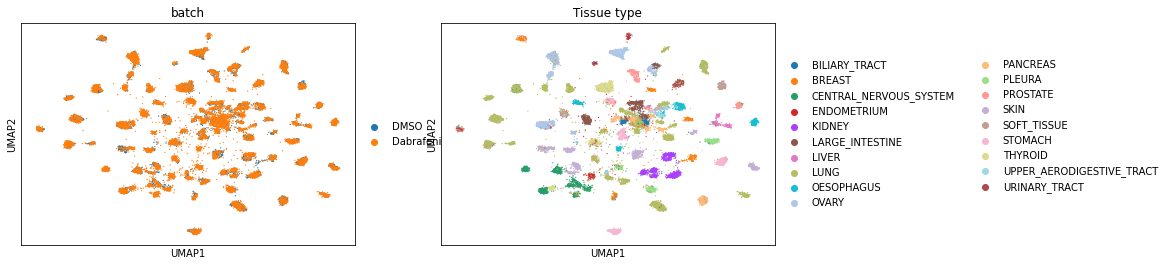

In [42]:
 sc.pl.umap(adata_concat, color=['batch', 'Tissue type'])

In [43]:
adata_concat.obs['BRAF_cnv']= adata_concat.obs['BRAF_cnv'].astype('float64')

In [44]:
adata_concat.obs

,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,Cell type,DepMap_ID,Tissue type,BRAF_mut_count,BRAF_cnv,MAPK_activity,batch
AAACCTGAGAGCAATT-1-DMSO,5984,5982,47009.0,2072.0,4.407667,UACC257_SKIN,ACH-000579,SKIN,1,1.082413,-0.216134,DMSO
AAACCTGAGATCTGAA-1-DMSO,6890,6890,68559.0,5358.0,7.815166,HEC1B_ENDOMETRIUM,ACH-000941,ENDOMETRIUM,1,1.114512,0.687991,DMSO
AAACCTGCACACTGCG-1-DMSO,5473,5472,41918.0,1544.0,3.683382,LOVO_LARGE_INTESTINE,ACH-000950,LARGE_INTESTINE,0,1.078604,-0.406762,DMSO
AAACCTGCACCAGATT-1-DMSO,6429,6429,58468.0,1795.0,3.070055,COLO680N_OESOPHAGUS,ACH-000717,OESOPHAGUS,0,0.816903,0.621545,DMSO
AAACCTGCAGCTCGAC-1-DMSO,7269,7269,63829.0,1734.0,2.716634,KYSE270_OESOPHAGUS,ACH-000873,OESOPHAGUS,0,0.791402,0.147986,DMSO
...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCATCGGCGGTT-1-Dabrafenib,3951,3951,22713.0,1901.0,8.369656,NCIH23_LUNG,ACH-000900,LUNG,0,1.090606,0.809126,Dabrafenib
TTTGTCATCGTTTGCC-1-Dabrafenib,5089,5089,26516.0,1237.0,4.665108,NCIH322_LUNG,ACH-000837,LUNG,0,0.517277,-0.571194,Dabrafenib
TTTGTCATCTAACTCT-1-Dabrafenib,5945,5945,33299.0,2084.0,6.258446,NCIH2444_LUNG,ACH-000186,LUNG,0,1.313912,2.513246,Dabrafenib
TTTGTCATCTCCGGTT-1-Dabrafenib,4734,4734,26461.0,1083.0,4.092816,ACCMESO1_PLEURA,ACH-000086,PLEURA,0,1.017327,0.020106,Dabrafenib


# Visualization

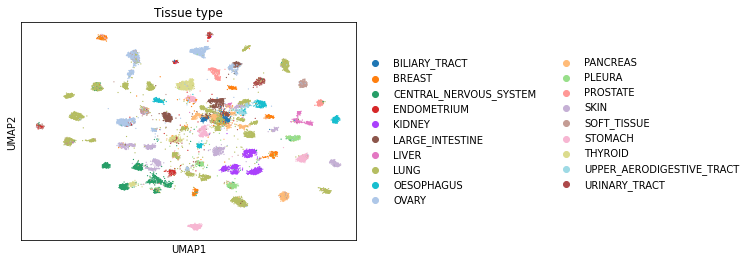

In [45]:
sc.pl.umap(adata_concat, color = 'Tissue type')

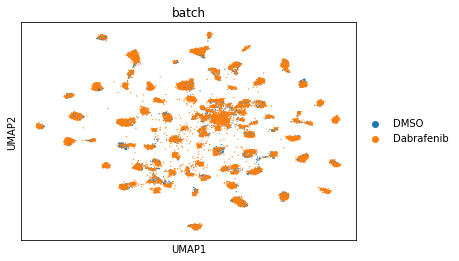

In [46]:
sc.pl.umap(adata_concat, color=['batch'])

The batches are comparable to MAPK activity. The BRAF mutation count, the copy number variations and the mutation counts are also depicted.

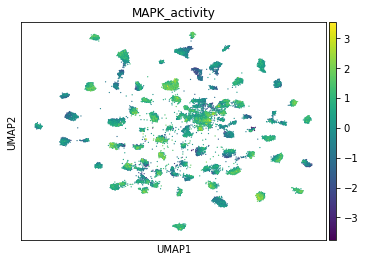

In [47]:
sc.pl.umap(adata_concat, color=['MAPK_activity']) 

In [48]:
adata_concat.obs['BRAF_mut_count'] = (adata_concat.obs['BRAF_mut_count']>0)*1

In [49]:
adata_concat.obs['BRAF_mut_count'] == 1

AAACCTGAGAGCAATT-1-DMSO           True
AAACCTGAGATCTGAA-1-DMSO           True
AAACCTGCACACTGCG-1-DMSO          False
AAACCTGCACCAGATT-1-DMSO          False
AAACCTGCAGCTCGAC-1-DMSO          False
                                 ...  
TTTGTCATCGGCGGTT-1-Dabrafenib    False
TTTGTCATCGTTTGCC-1-Dabrafenib    False
TTTGTCATCTAACTCT-1-Dabrafenib    False
TTTGTCATCTCCGGTT-1-Dabrafenib    False
TTTGTCATCTTATCTG-1-Dabrafenib    False
Name: BRAF_mut_count, Length: 19170, dtype: bool

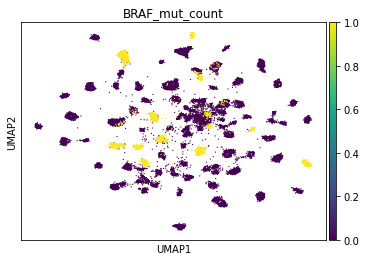

In [50]:
sc.pl.umap(adata_concat, color= ['BRAF_mut_count'])

## Assessing MAPK activity

Calculating the correlation between mutation counts and MAPK activity.

In [51]:
pearsonr(adata_concat.obs['MAPK_activity'], adata_concat.obs['BRAF_mut_count'])

(-0.06746135271927298, 8.726968742152043e-21)

Plotting the MAPK activity in regard to the batches and mutation counts.

Text(0, 0.5, 'MAPK activity')

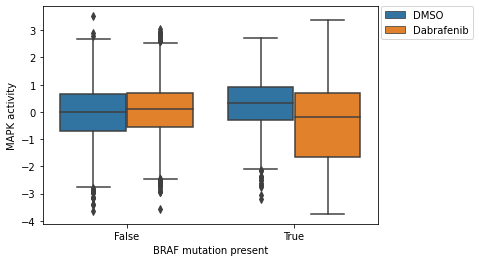

In [81]:
sns.boxplot(hue=adata_concat.obs['batch'], y=adata_concat.obs['MAPK_activity'], 
            x=adata_concat.obs['BRAF_mut_count']>0)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.xlabel('BRAF mutation present')
plt.ylabel('MAPK activity')

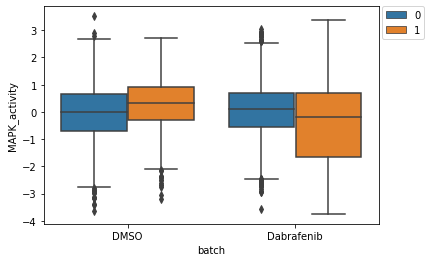

In [53]:
sns.boxplot(hue=adata_concat.obs['BRAF_mut_count'], y=adata_concat.obs['MAPK_activity'], 
            x=adata_concat.obs['batch'])
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

In [54]:
adata_concat.obs['BRAF_mut_count'] = (adata_concat.obs['BRAF_mut_count']>0)*1

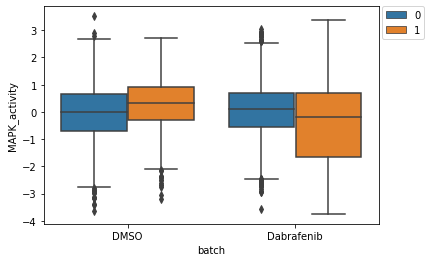

In [55]:
sns.boxplot(hue=adata_concat.obs['BRAF_mut_count'], y=adata_concat.obs['MAPK_activity'], 
            x=adata_concat.obs['batch'])
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

## Fitting models: MAPK activity

Two models fitted: one with the addition of batches, the other with the multiplicative interaction of the batches.

https://www.statsmodels.org/devel/example_formulas.html

In [56]:
model = smf.ols('MAPK_activity ~ BRAF_mut_count + batch', data=adata_concat.obs).fit()

In [57]:
model.params

Intercept              0.029692
batch[T.Dabrafenib]   -0.004581
BRAF_mut_count        -0.197576
dtype: float64

In [58]:
model.pvalues

Intercept              1.941097e-02
batch[T.Dabrafenib]    7.628998e-01
BRAF_mut_count         8.353758e-21
dtype: float64

In [59]:
model = smf.ols('MAPK_activity ~ BRAF_mut_count * batch', data=adata_concat.obs).fit()

In [60]:
model.params

Intercept                            -0.046755
batch[T.Dabrafenib]                   0.110767
BRAF_mut_count                        0.311114
BRAF_mut_count:batch[T.Dabrafenib]   -0.814772
dtype: float64

In [61]:
model.pvalues

Intercept                             4.063835e-04
batch[T.Dabrafenib]                   9.321757e-12
BRAF_mut_count                        8.033612e-20
BRAF_mut_count:batch[T.Dabrafenib]    9.014956e-79
dtype: float64

## CEVIChE cell viability prediction

Download the necessary
<a href="https://saezlab.shinyapps.io/ceviche/_w_a1dec541/session/b0540761d9da082a04bdf713f386ec99/download/download_achilles_model?w=a1dec541" target="_blank">achilles_model.csv</a>. The common genes are listed, then the *'Predicted_viability'* is calculated and added to the dataframe.

In [62]:
ceviche = pd.read_csv('../data/achilles_model.csv', sep=',', header=0, index_col=0)

In [63]:
gex = adata_concat.to_df()

In [64]:
common_genes = list(set(adata_concat.var.index) & set(ceviche.index))


In [65]:
len(common_genes)

969

In [66]:
gex = gex[common_genes]
ceviche = ceviche.loc[common_genes]

In [67]:
cell_viability = np.dot(gex, ceviche)

In [68]:
cell_viability.shape

(19170, 1)

In [69]:
adata_concat.obs['Predicted_viability'] = cell_viability

The predicted viability is comparable to the MAPK activity and the mutation counts.

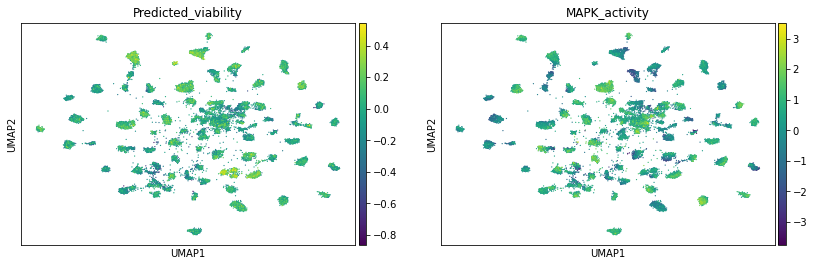

In [70]:
sc.pl.umap( adata_concat, color = ['Predicted_viability', 'MAPK_activity'] )

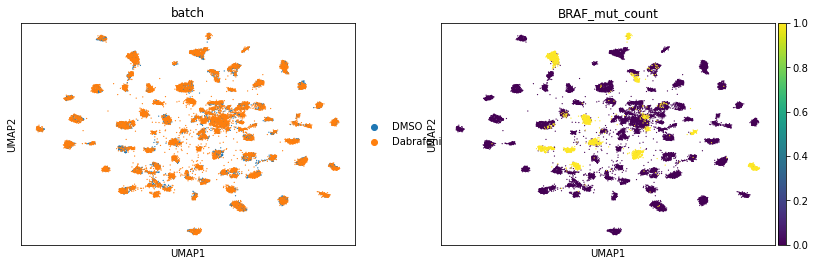

In [71]:
sc.pl.umap( adata_concat, color = ['batch', 'BRAF_mut_count'] )

In [72]:
pearsonr(adata_concat.obs['BRAF_mut_count'], adata_concat.obs['Predicted_viability'])

(0.03363647916635878, 3.190188759978846e-06)

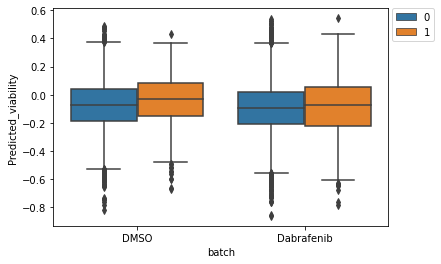

In [73]:
sns.boxplot(hue=adata_concat.obs['BRAF_mut_count'], y=adata_concat.obs['Predicted_viability'], 
            x=adata_concat.obs['batch'])
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

Text(0, 0.5, 'Predicted viability')

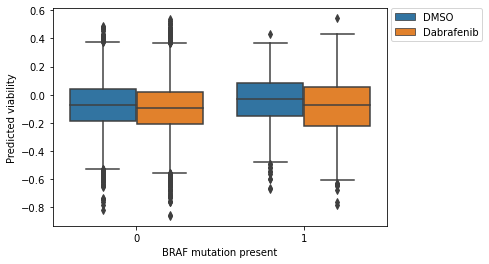

In [82]:
sns.boxplot(hue=adata_concat.obs['batch'], y=adata_concat.obs['Predicted_viability'], 
            x=adata_concat.obs['BRAF_mut_count'])
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.xlabel('BRAF mutation present')
plt.ylabel('Predicted viability')

## Fitting models: cell viability

Two models fitted: one with the addition of batches, the other with the multiplicative interaction of the batches.

In [75]:
model = smf.ols('Predicted_viability ~ BRAF_mut_count + batch', data=adata_concat.obs).fit()

In [76]:
model.params

Intercept             -0.074527
batch[T.Dabrafenib]   -0.021842
BRAF_mut_count         0.016580
dtype: float64

In [77]:
model.pvalues

Intercept              8.308591e-231
batch[T.Dabrafenib]     7.951820e-16
BRAF_mut_count          1.062435e-05
dtype: float64

In [78]:
model = smf.ols('Predicted_viability ~ BRAF_mut_count * batch', data=adata_concat.obs).fit()

In [79]:
model.params

Intercept                            -0.077303
batch[T.Dabrafenib]                  -0.017653
BRAF_mut_count                        0.035054
BRAF_mut_count:batch[T.Dabrafenib]   -0.029590
dtype: float64

In [80]:
model.pvalues

Intercept                             2.216028e-225
batch[T.Dabrafenib]                    1.579479e-09
BRAF_mut_count                         1.143253e-08
BRAF_mut_count:batch[T.Dabrafenib]     1.400952e-04
dtype: float64